# Project 1: Travel Insurance or Not in Houston?

* Alejandra Zapata (Katz School of Yeshiva University)         
* Ke Chen (Katz School of Yeshiva University)

## 0. Introduction

Trip insurance was popular a couple years ago. It can include lesser known elements including travel delay, lost, damaged and delayed baggage, medical and emergency evacuation coverage. Passangers are willing to pay a small amount of money to get the one-time coverage. Frequent plane takers even have special tricks for buying the insurance. However, in recent years, some insurance companies gradually abandoned the travel insurance services.

In this project, the dataset of US commercial domestic airline flights that departed from two separate airports in Houston, TX (IAH and HOU) during the January and February of 2011 was analyzed. The analysis focuses on finding trends of cancellations and delays from both Houston airports (location parameter), airline carriers (operation parameter), and the day of week (time parameter). An experiment also take into discussion the delay rate along with the delay minutes. Ultimately, The result can be a simple reference for insurance’s company in Houston area to determine the policies and travel insurance product availability. It also can a reference for Houston passangers' decision on the travel insurance purchase.

### Index

1. Importing the Dataset
2. Data Preparation
3. Exploratory Data Analysis
    
    3.1. *General View of Dataset*

    3.2. *Preliminary Cancellation Total per Origin Airports*
    
    3.3. *Preliminary Cancellation Total per Carrier*
    
    
4. Research and Results: Cancellation & Delay Analysis
   
   4.1. *Cancellation*
   
       4.1.1. In which airport were the flights more likely to be cancelled?
     
       4.1.2. Which airport carrier had the least and most cancellations?
   
   4.2. *On-Time Performance*
   
       4.2.1. Which airport had a better performance of departure?
     
       4.2.2. What day of the week has the most and least delays?
     
       4.2.3. What is the trend of delay rates along with delay minutes? 
        
5. Discussion and Conclusion

## 1. Importing the Dataset

In [1]:
import pandas as pd

hflights_orgfile = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
hflights_df= pd.read_csv(hflights_orgfile)

hflights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


The whole dataset is a 20000 rows and 21 columns dataframe with evidence shown below.

In [2]:
type(hflights_df)

pandas.core.frame.DataFrame

In [3]:
# Use df.shape() to know the row and columns of the dataset
print ('The dataset has '+str(hflights_df.shape[0])+' rows and '+str(hflights_df.shape[1])+' columns.')

The dataset has 20000 rows and 21 columns.


## 2. Data Preparation

* In order to evaluate only cancellations, columns of UniqueCarrier, FlightNum, Origin, Destination, Distance and if Cancelled were taken out as a new dataframe: cancelrate.

In [4]:
# Use double brakets to select the columns and form a new dataframe
cancelrate=hflights_df[['DayOfWeek','UniqueCarrier','FlightNum','Origin','Dest','Distance','Cancelled']]
cancelrate.head()

,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest,Distance,Cancelled
0,6,AA,428,IAH,DFW,224,0
1,7,AA,428,IAH,DFW,224,0
2,1,AA,428,IAH,DFW,224,0
3,2,AA,428,IAH,DFW,224,0
4,3,AA,428,IAH,DFW,224,0


* In order to evaluate flights performance we have taken out those flights that were cancelled to have more accurate results in terms of those flights that did operate. Rows with Cancelled value 1 were taken out as a new dataframe: hflights_regular, to evaluate the on-time performance of the flights.

In [5]:
hflights_regular=hflights_df[hflights_df['Cancelled']==0].reset_index()
hflights_regular.tail()

,index,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
19771,19995,2011,2,25,5,1126.0,1333.0,CO,1719,N19621,...,8.0,-4.0,IAH,MTJ,926,5.0,30.0,0,NaN,0
19772,19996,2011,2,25,5,941.0,1111.0,CO,1723,N37298,...,0.0,11.0,IAH,ONT,1334,5.0,12.0,0,NaN,0
19773,19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,...,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,NaN,0
19774,19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,...,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,NaN,0
19775,19999,2011,2,25,5,1255.0,1553.0,CO,1757,N14604,...,-3.0,5.0,IAH,ATL,689,13.0,22.0,0,NaN,0


## 3. Exploratory Data Analysis

### 3.1 General View of Dataset

IAH stands for George Bush International Airport. It has 5 terminals (A,B,C,D,E). We see with the following information during 2011 there were over 15k flights that departed from here. This information will be important when we further analyze and compare the performance of both airports.

In [6]:
IAHflights=hflights_df[hflights_df.Origin == 'IAH'].shape[0]
print('The number of flights departed from IAH on Jan and Feb on 2011 is', IAHflights)

The number of flights departed from IAH on Jan and Feb on 2011 is 15681


HOU is the William P. Hobby International Airport. Different from IAH, it only had one terminal. The number of flights that departed from HOU during the data frame period of time is over 4k.

In [7]:
HOUflights=hflights_df[hflights_df.Origin == 'HOU'].shape[0]
print('The number of flights departed from HOU on Jan and Feb on 2011 is', HOUflights)

The number of flights departed from HOU on Jan and Feb on 2011 is 4319


As the destination of the two Houston area aiports vary, from the furthest destination airport, which is Honululu (HNL) with index number 355, to the nearest airport, Lake Charles Regional Airport (LCH) with index number 12208 as shown below.

* Using .idxmax() and .idxmin() to reach the maximum and minimun value index, apply the index number to the destination column.

In [8]:
# Use .idxmax() to reach the index of the maximum value
idxmax=hflights_df['Distance'].idxmax()
hflights_df.loc[[idxmax],['Dest']]

,Dest
355,HNL


In [9]:
# Use .idxmin() to reach the index of the minimum value
idxmin=hflights_df['Distance'].idxmin()
hflights_df.loc[[idxmin],['Dest']]

,Dest
12208,LCH


14 airlines are based on Houston area in the 2 airports. The code of the carriers are show in the below numpy array.

* Using .unique() to reach the unique values of UniqueCarrier columns

In [10]:
hflights_df['UniqueCarrier'].unique()

array(['AA', 'AS', 'B6', 'CO', 'DL', 'OO', 'UA', 'US', 'WN', 'EV', 'F9',
       'FL', 'MQ', 'XE'], dtype=object)

* Using .nunique() to reach the number of unique values.

In [11]:
hflights_df['UniqueCarrier'].nunique()

14

### 3.2 Preliminary Cancellation Total per Origin Airports

To hypothesize questions about cancellations and their relationship to the Houston Airports, some preliminary visualizations that would inform us on the average performance of each were run below.

Text(0, 0.5, 'Number of Cancelled Flights')

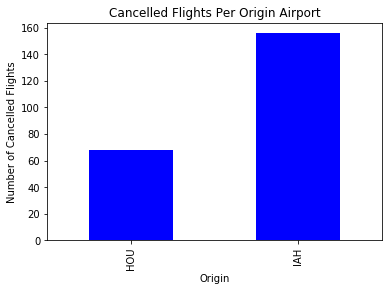

In [12]:
#groupby separates the column per origin
viz=cancelrate.groupby('Origin')['Cancelled'].sum().plot.bar(title='Cancelled Flights Per Origin Airport', color='blue')
viz.set_ylabel('Number of Cancelled Flights')

This bar graph showed IAH had a larger number of cancellations. On our research questions we will look into the cancellation rates and compare our results.

### 3.3 Preliminary Cancellation Total per Carrier

On the following graph, the initial trends per airlines need to be understand to inform our reserach analysis. The research analysis will look at the total cancellation flights amount of each carrier. This graph gives us an initial look into the relationship of carriers and the cancellations.

Text(0, 0.5, 'Number of Cancelled Flights')

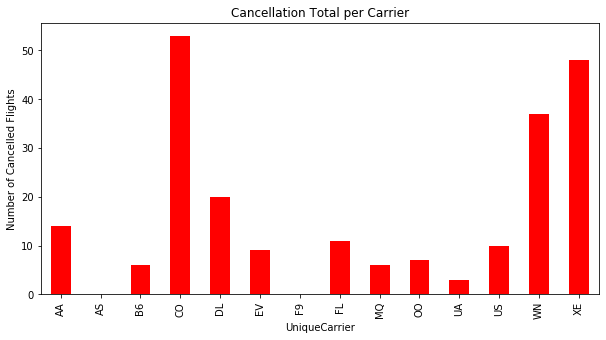

In [13]:
viz2=cancelrate.groupby('UniqueCarrier')['Cancelled'].sum().plot.bar(title='Cancellation Total per Carrier',figsize=(10,5), color='red')
viz2.set_ylabel('Number of Cancelled Flights')

This bar graph showed overall cancellations of all carriers of Houston area. It shows CO had the most cancellation and F9, AS, FL, UA and US had the lowest total. On our research analysis, the rate of cancellations will be compared with this results.

## 4. Research and Results: Cancellation and Delay Analysis
The information drawn from the analysis would be helpful to passengers who often fly from Houston to compare 2 airports and airlines flying from them. The result could indicate the risk to select airport and airlines when traveling.

### 4.1 Cancellation

#### 4.1.1 In which airport, the flights were more likely to be cancelled?

* In the cancelled column, 1 indicates cancelled. Therefore, two conditions were used to filter out both flight supposed to be taken off from IAH but cancelled, and from HOU but cancelled, respectively, to calculate the cancellation rate of the 2 airports. 

In [14]:
#Use dataFrame.shape to get the number of rows
cancel_IAH_count=cancelrate[(cancelrate['Origin']=='IAH') & (cancelrate['Cancelled']==1)].shape[0]
total_IAH_count=cancelrate[cancelrate['Origin']=='IAH'].shape[0]

#IAH cancellation rate
print ('IAH had the cancellation rate of '+ str(round(cancel_IAH_count/total_IAH_count*100,2))+'%.')

IAH had the cancellation rate of 0.99%.


In [15]:
#Use dataFrame.shape to get the number of rows
cancel_HOU_count=cancelrate[(cancelrate['Origin']=='HOU') & (cancelrate['Cancelled']==1)].shape[0]
total_HOU_count=cancelrate[cancelrate['Origin']=='HOU'].shape[0]

#IAH cancellation rate
print ('HOU had the cancellation rate of '+ str(round(cancel_HOU_count/total_HOU_count*100,2))+'%.')

HOU had the cancellation rate of 1.57%.


As the result showing, HOU had a slightly higher cancellation rate. 

#### 4.1.2 Which airline carriers had the least and the most cancellations?

* As the carriers are more than the origin airports, it is wise to create a function to loop the different carriers.

In [16]:
# This function is available to check all the columns, x is the column being checked.
def cancel_rate (x):
    a={}
    # loop the unique values in column x
    for i in cancelrate[x].unique():
        # calculate the cancellation rate under the unique value 
        rate=round(cancelrate[(cancelrate[x]==i) & (cancelrate['Cancelled']==1)].shape[0]/cancelrate[cancelrate[x]==i].shape[0]*100,2)
        # store all result to a dictionary
        a[i]=rate
    # convert dictionary to dataframe
    return pd.DataFrame.from_dict(a.items())

# Apply it to UniqueCarrier column
cancel_rate('UniqueCarrier').max()


0      XE
1    8.49
dtype: object

In [17]:
cancel_rate('UniqueCarrier').min()

0    AA
1     0
dtype: object

As the above result shown, XE had the highest cancellation rate 8.49%, and AA had the lowest cancellation rate 0.00%. This analysis is for both airports in Houston. The airlines with max and min cancellation rate are different from those with max and min total. The analysis further our knowledge and showed more information to determine reliability per carriers.

Text(0, 0.5, 'Total Cancelled Flights')

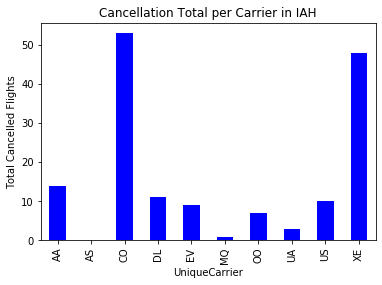

In [18]:
IAH1=cancelrate[cancelrate['Origin']=='IAH']
viz3=IAH1.groupby('UniqueCarrier')['Cancelled'].sum().plot.bar(title='Cancellation Total per Carrier in IAH', color='blue')
viz3.set_ylabel('Total Cancelled Flights')

For IAH, CO had the highest number of cancelled flights (50+) whereas AS had the lowest (0).

Text(0, 0.5, 'Total Cancelled Flights')

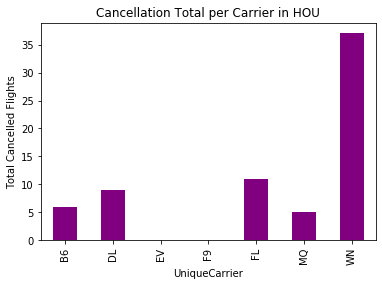

In [19]:
HOU1=cancelrate[cancelrate['Origin']=='HOU'] #Extracts only flights with HOU origin
viz4=HOU1.groupby('UniqueCarrier')['Cancelled'].sum().plot.bar(title='Cancellation Total per Carrier in HOU', color='purple')
viz4.set_ylabel('Total Cancelled Flights')

For HOU, WN had the highest total of cancellations(35+) whereas both EV and F9 had the lowest (0).

### 4.2 On-Time Performance

#### 4.2.1 Which airport had a better performance of departure?

* Based on the non-cancellation dataframe, all rows with departure delay time over 0 will be count as not on-time departure. Therefore, use IAH['DepDelay']>0 to filter out not departed on-time flights for calculation. 

In [20]:
#Calculate the on-time departure rate of IAH

IAH=hflights_regular[hflights_regular['Origin']=='IAH']

result_IAH=100-round((len(IAH[IAH['DepDelay']>0])/len(IAH))*100.0,2)
print ('The on-time departure rate of IAH is '+str(result_IAH)+'%.')

The on-time departure rate of IAH is 53.54%.


In [21]:
#Calculate the on-time departure rate of HOU

HOU=hflights_regular[hflights_regular['Origin']=='HOU']
result_HOU=100-round((len(HOU[HOU['DepDelay']>0])/len(HOU))*100.0,2)
print ('The on-time departure rate of HOU is '+str(result_HOU)+'%.')

The on-time departure rate of HOU is 33.8%.


IAH had a better on-time depature performance, which is 53.54%, higher than HOU, which is 33.80%.

#### 4.2.2 What day of the week has the most and least delays?
* On which day per airport had a better performance will be examined below. The average departure delayed flights amount on each day of the week will be helpful in providing passengers and insurance company's what day may have more risk.

In [22]:
IAHmeandelay_perweekday = IAH.groupby('DayOfWeek')['DepDelay'].mean()
print(IAHmeandelay_perweekday)

DayOfWeek
1    9.202722
2    6.836009
3    2.685876
4    7.417425
5    6.177739
6    4.913024
7    9.070508
Name: DepDelay, dtype: float64


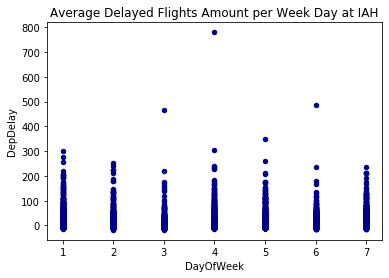

In [23]:
viz5 = IAH.plot.scatter(title='Average Delayed Flights Amount per Week Day at IAH',x='DayOfWeek',
                      y='DepDelay',
                      c='DarkBlue')

IAH has a higher average of departure delayed flights on Mondays and Sundays. The lowest day is Wednesday. According to Simple Flying (https://simpleflying.com/best-days-to-fly/), Tuesdays and Wednesdays tend to be less busy due to people having to take more days of work. We see that this information slightly varies for this specific airport, being that Tuesday is in the Top 3 busiest days.

In [24]:
HOUmeandelay_perweekday = HOU.groupby('DayOfWeek')['DepDelay'].mean()
print(HOUmeandelay_perweekday)

DayOfWeek
1    16.079561
2    15.103565
3    10.307167
4    12.876481
5    12.560201
6    10.423459
7    15.541985
Name: DepDelay, dtype: float64


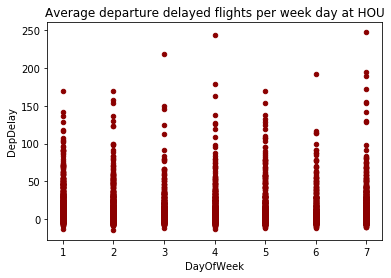

In [25]:
viz6 = HOU.plot.scatter(title='Average departure delayed flights per week day at HOU',x='DayOfWeek',
                      y='DepDelay',
                      c='DarkRed')

Similarly, for HOU, Monday and Sunday are the busiest, while Wednesday and Saturday are the least busy.

#### 4.2.3 What is the trend of delay rate along with delay minutes? 

* In this part, an interesting experiment was done for plotting the delay minutes and departure delay rates relationship. The delay minutes list was created by 5 minutes step. Use a function to loop designated delay minutes and plot the relationship between delay minutes and delay rates. It could be a prediction for how long passengers need to be expected for the delay.

AxesSubplot(0.125,0.125;0.775x0.755)


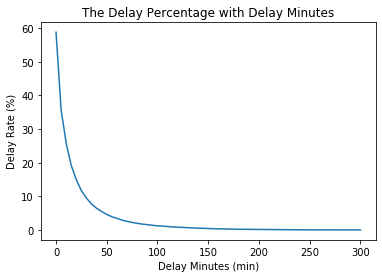

In [26]:
# create a list from 0-300 minutes, 5 minutes step.
delaylevel=range(0,301,5)
delayratelist=[]

# define a function to calcuate the delay rate under the designated minutes level
def delay_(x):
    #take the rows delay more than x minutes and calculate the percentage.
    delay=hflights_regular[hflights_regular['DepDelay']>=x]
    delay_rate=round(len(delay)/len(hflights_regular)*100,2)
    return delay_rate

# Loop the designated minutes and create a new list with the delay_ function 
for i in delaylevel:
    delayratelist.append(delay_(i))

# create a dataframe with pandas using delayratelist 
delayratelist_df=pd.DataFrame(delayratelist,index=delaylevel, columns=['Delay Rate'])

# create a line plot
viz7 = delayratelist_df.plot(title ='The Delay Percentage with Delay Minutes', legend=False)
# set labels for x and y axis
viz7.set(xlabel='Delay Minutes (min)', ylabel='Delay Rate (%)')
print(viz7)

The chart shows, delay rate is high within 0-50 minutes. This indicates that it is more possible to have a delay of 0-50 minutes. There is a lower possibility of having more than 50 min delay. 

## 5. Discussion and Conclusion

#### Cancellation

##### Airport Comparison

* The analysis determined that HOU had a higher rate of cancellation. However, after looking back at our preliminary analysis we noticed HOU had a significant smaller number of flights that departed from which there was a higher rate. By pooling the information from IAH, we ask ourselves if IAH had a smaller rate because having more experience it may operate better or looking further the number of flights might affect the result and show that it has a high performance.

* Climatic conditions were not taken into consideration as a reason for the cancellations because both airports are very close to each other and would have very similar, if not same, weather conditions. Concluding that the cancellations were due to operational reasons.

##### Airline Comparison

* It can be quickly determined that XE for both airports has the highest rate of cancellation whereas it had one of the lowest average for IAH. 
* AA had a 0.0% rate cancellation on both airports whereas the graph determined it had similar cancellation average to other airlines in IAH.
* We can determine that those airlines with less than 5 cancellations are fairly reliable.

#### Departure Delay

##### Airport Comparison

* Similar to the cancellation comparison between airports, for the on time performance IAH performed better. We might need more information in order to do a fair comparison due to the large difference between the number of flights.

##### Week Day Performance

* For both airports Monday and Sunday had the highest average of delay. By doing further research we determined that those are often some of the busiest days. Whereas Wednesday, which had lowest average for both airports, is ranked as one of the quietest days on airport. 

* One surprusing result was that Tuesdays rated as one of the days with a higher delay average and it's often now to be on the less busy list. Both airports showed a similar behavior.

##### Trend of Delay Possibility

* Lastly, we determined that there is a smaller possibility of having a delay of over 50 minutes on both airports. This information is important in determining whether the delay is substantial or not and the complete report could inform passengers which days, from which airport, flying with a certain airline, it may be worth it to buy insurance or not.

